This notebook is demonstation for challenge "Vietnamese NLP Continual Learning". In the past, Underthesea has mainly focused on tuning model. With this project, we create a simple challenge for ourselves to build a continuous learning NLP system.

## The August 2021 Challenges Vietnamese NLP Dataset for Continual Learning

The August 2021 Challenges include [part-of-speech tagging](https://en.wikipedia.org/wiki/Part-of-speech_tagging) and [dependency parsing](https://universaldependencies.org/).

### Create environment

In [1]:
%load_ext autoreload
%autoreload 2

# add project folder
import os
from os.path import dirname, join
PROJECT_FOLDER = dirname(dirname(os.getcwd()))
os.sys.path.append(PROJECT_FOLDER)

# add dependencies
from underthesea.utils.col_analyzer import UDAnalyzer, computeIDF
from underthesea.utils.col_script import UDDataset
from IPython.display import display, display_png
from wordcloud import WordCloud
from PIL import Image
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# init folder
DATASETS_FOLDER = join(PROJECT_FOLDER, "datasets")
COL_FOLDER = join(DATASETS_FOLDER, "UD_Vietnamese-COL")
raw_file = join(COL_FOLDER, "corpus", "raw", "202108.txt")

Load dictionary with 31327 words.


### Datasets

In [2]:
%%capture
raw_file = join(COL_FOLDER, "corpus", "raw", "202108.txt")
generated_dataset = UDDataset.load_from_raw_file(raw_file)

ud_file = join(COL_FOLDER, "corpus", "ud", "202108.txt")
ud_dataset = UDDataset.load(ud_file)

generated_dataset.merge(ud_dataset)
dataset = generated_dataset

dataset.write(ud_file)

In [3]:
analyzer = UDAnalyzer()

In [4]:
analyzer.analyze_dataset_len(dataset)
words_pos = analyzer.analyze_words_pos(dataset)
punctuations = set(words_pos[words_pos['pos'] == 'CH']['word'])

Number of sentences 1085


In [5]:
sent_ids = analyzer.analyze_sent_ids(dataset)

In [6]:
doc_sents = analyzer.analyze_doc_sent_freq(dataset)

Number of doc URLs 87


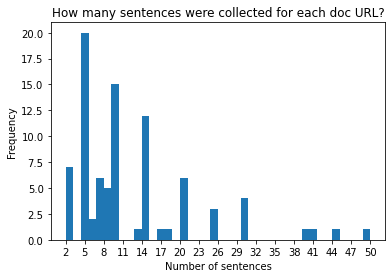

In [7]:
x = [item[1] for item in doc_sents]
plt.hist(x, bins=40)
plt.xticks(np.arange(min(x), max(x)+1, 3))
plt.title("How many sentences were collected for each doc URL?")
plt.xlabel("Number of sentences")
plt.ylabel("Frequency")
plt.show()

#### Stopwords using IDF

In [8]:
doc_word_freqs = analyzer.get_doc_word_counters(dataset).values()
idfs = computeIDF(doc_word_freqs)
print("Words with lowest IDFs are candidates for Stopwords!")
stopwords_idf = {k: v for k, v in sorted(dict(idfs).items(), key=lambda x: x[1])[:40]}
stopwords_idf

Words with lowest IDFs are candidates for Stopwords!


{',': 0.0,
 '.': 0.0,
 'và': 0.06445798922691845,
 'của': 0.09442121260436169,
 'được': 0.10067016188136323,
 'cho': 0.10067016188136323,
 'là': 0.11344444991779208,
 'các': 0.11344444991779208,
 'trong': 0.11344444991779208,
 'với': 0.13333927863473136,
 'đã': 0.14712756312036465,
 'người': 0.15418941760785151,
 'có': 0.15418941760785151,
 'để': 0.16866724097647437,
 'này': 0.18364439694612714,
 'từ': 0.18364439694612714,
 'nhiều': 0.20712549279565,
 'theo': 0.20712549279565,
 'đến': 0.22351590898381937,
 'một': 0.22351590898381937,
 'không': 0.22351590898381937,
 'ở': 0.2319490765206821,
 'vào': 0.24932317259010486,
 'khi': 0.24932317259010486,
 'cũng': 0.24932317259010486,
 'đó': 0.2582780152430313,
 'những': 0.267421394682901,
 'về': 0.28630673884327484,
 '(': 0.28630673884327484,
 ')': 0.28630673884327484,
 'tại': 0.2960665761324311,
 'phải': 0.306050797039032,
 'ngày': 0.3162699622207181,
 'việc': 0.3162699622207181,
 'sẽ': 0.32673539589888306,
 'trên': 0.32673539589888306,
 'năm

#### Stopwords using Kullback-Leibler divergence

In [9]:
from underthesea.datasets import stopwords
",".join(sorted(stopwords.words))

',10,2,bị,chỉ,các,còn,có,của,gì,hay,hiện,khi,không,là,lại,lần,mà,mình,một,nhiều,như,những,này,năm,qua,ra,rất,rằng,sau,sẽ,số,theo,trong,tuy nhiên,tại,tới,từ,và,vào,vẫn,về,xảy,đi,đã,đó,được,đến,đều,để,đồng,đợt,ở'

### Actionable Insights

We want to explore:

* What is word frequencies?
* What is word frequencies today?
* How many words in this corpus?
* What are out of vocabulary words?

#### What are words

In [10]:
counter = analyzer.analyze_words(dataset)

Most common words:
 [('và', 332), ('của', 313), ('các', 286), ('trong', 256), ('được', 240), ('người', 238), ('cho', 236), ('có', 208), ('là', 207), ('đã', 199), ('với', 196), ('không', 196), ('để', 180), ('đến', 160), ('một', 157), ('những', 142), ('này', 132), ('ở', 126), ('khi', 123), ('ngày', 118), ('từ', 118), ('nhiều', 116), ('theo', 101), ('vào', 97), ('trên', 97), ('về', 94), ('sẽ', 90), ('tại', 90), ('cũng', 90), ('bị', 86), ('đó', 84), ('phải', 82), ('năm', 80), ('tôi', 80), ('việc', 78), ('sau', 78), ('lại', 76), ('ra', 75), ('như', 75), ('đang', 72), ('ông', 72), ('anh', 71), ('2', 67), ('hơn', 65), ('nhà', 63), ('chỉ', 62), ('mình', 59), ('thông tin', 58), ('biết', 57), ('số', 56)]
Corpus words:  3605
Noun phrases:
 {'Munich', 'Sa', 'Natalia Garizabal', 'Vietnam Post', 'Inter Milan', 'Đập', 'Atletico', 'Michael Kokalari', 'Tú', 'CNBC', 'Falcon', 'Strasbourg', 'Văn Hậu', 'Ghen', 'Ban Nha', 'TT&TT', 'Paul Pogba', 'Cần Thơ', 'Mã Lai', 'Der Bomber', 'Chuyên Toán', 'Thu Hạnh', 

#### Remove some (potential) stopwords to get clearer Wordcloud

In [11]:
wordlist = [word for word in counter]
for word in wordlist:
    if word in stopwords_idf or word in punctuations:
        del counter[word]

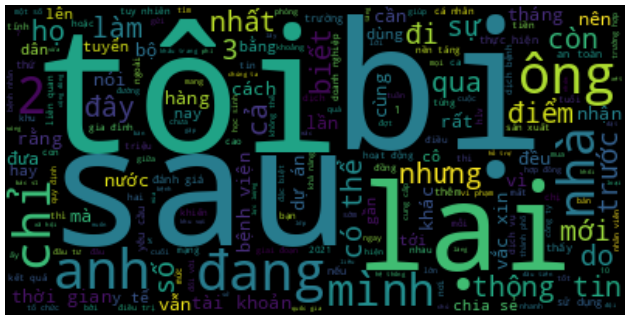

In [12]:
w1 = WordCloud().generate_from_frequencies(counter)
plt.figure(figsize=(16, 12), dpi=50)
plt.imshow(w1, interpolation="bilinear")
plt.axis("off")
plt.show()

Beautiful word cloud for most frequencies words in this corpus.

#### What are today words?

In [13]:
counter = analyzer.analyze_today_words(dataset)

Most common words:
 [('được', 42), ('các', 39), ('có', 36), ('và', 35), ('trong', 33), ('cho', 32), ('dự án', 32), ('của', 32), ('là', 28), ('để', 26), ('không', 23), ('đến', 19), ('nhà', 19), ('một', 19), ('đánh giá', 19), ('làng', 17), ('với', 16), ('sẽ', 16), ('tại', 15), ('người', 14), ('ở', 14), ('đã', 14), ('này', 14), ('3', 14), ('nhiều', 13), ('lại', 13), ('đó', 12), ('phải', 12), ('trên', 12), ('vào', 11), ('bộ', 11), ('theo', 11), ('chuối', 11), ('khi', 11), ('công nhân', 10), ('như', 10), ('hơn', 10), ('khu', 10), ('thực hiện', 10), ('trang trại', 10), ('bằng', 10), ('năm', 9), ('làm', 9), ('đất', 9), ('tỉnh', 9), ('hệ thống', 9), ('thời gian', 9), ('ra', 9), ('giúp', 9), ('việc', 9)]
Corpus words:  1030
Noun phrases:
 {'Quan Hoá', 'Cụ', 'Quốc Phòng', 'Rạng Đông', 'P.Phú Thuỷ', 'He Chuanxin', 'TP.HCM', 'Đài Loan', 'Phú Xuân', 'Hưng Long', 'Bình Thuận', 'Đức Huệ', 'Đức Long', 'Hamubay', 'Covid-19', 'Nam', 'Phúc', 'Hồi Xuân', 'P.Phú Hài', 'Lương Quỳnh', 'P.Mũi Né', 'Sea Link M

#### Remove some (potential) stopwords to get clearer Wordcloud

In [14]:
wordlist = [word for word in counter]
for word in wordlist:
    if word in stopwords_idf or word in punctuations:
        del counter[word]

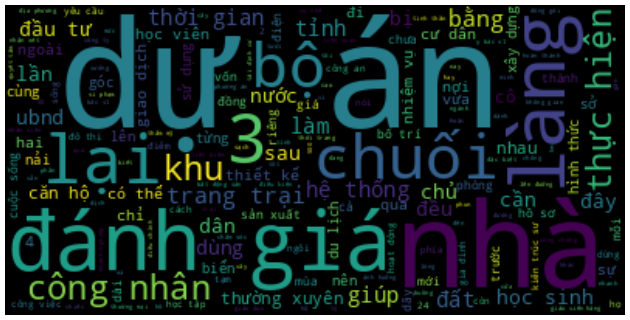

In [15]:
w1 = WordCloud().generate_from_frequencies(counter)
plt.figure(figsize=(16, 12), dpi=50)
plt.imshow(w1, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Trending News

In [16]:
%%javascript
    var script = document.createElement('script');
    script.type = 'text/javascript';
    script.src = '//cdnjs.cloudflare.com/ajax/libs/d3/7.0.1/d3.min.js';
    document.head.appendChild(script);
    console.log(window.d3)
    
    var script = document.createElement('script');
    script.type = 'text/javascript';
    script.src = '//cdnjs.cloudflare.com/ajax/libs/jquery/3.6.0/jquery.min.js';
    document.head.appendChild(script);
    console.log(window.$)

<IPython.core.display.Javascript object>

In [18]:
from IPython.display import Javascript
from ui import generate_svg_script
svg_script = generate_svg_script(dataset.get_by_sent_id("991").get_ud_str())

Javascript(svg_script)

<IPython.core.display.Javascript object>

Trending News Today

## How to Contribute?

It's great that you find this project interesting ❤️. Even the smallest contribute is appreciated. Welcome to this exciting journey with us.

### You can contribute in so many ways!

* [Create more usefull open datasets](https://github.com/undertheseanlp/underthesea/tree/master/datasets/UD_Vietnamese-COL)
* [Create more actionable insights](https://github.com/undertheseanlp/underthesea/tree/master/datasets/UD_Vietnamese-COL)